In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# load dataset
df = pd.read_csv('Churn_Modelling.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1        NaN             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4      

In [22]:
# check for missing values
print(df.isnull().sum())
# drop missing values if any
df.dropna(inplace=True)


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [23]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
# drop unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [25]:
# check columns 
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [26]:
# encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) # male 1 / female 0
df = pd.get_dummies(df, columns=['Geography'], drop_first=True) # One Hot Encoding

In [27]:
# define features and target variable
feature_names = [col for col in df.columns if col != 'Exited']
X = df[feature_names]
y = df['Exited'] # 0 Not Churn / 1 Churn

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9998 non-null   int64  
 1   Gender             9998 non-null   int64  
 2   Age                9998 non-null   float64
 3   Tenure             9998 non-null   int64  
 4   Balance            9998 non-null   float64
 5   NumOfProducts      9998 non-null   int64  
 6   HasCrCard          9998 non-null   float64
 7   IsActiveMember     9998 non-null   float64
 8   EstimatedSalary    9998 non-null   float64
 9   Exited             9998 non-null   int64  
 10  Geography_Germany  9998 non-null   bool   
 11  Geography_Spain    9998 non-null   bool   
dtypes: bool(2), float64(5), int64(5)
memory usage: 878.7 KB


In [29]:
# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# standardize features (numberical only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [32]:
# make predictions
y_pred = knn.predict(X_test_scaled)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred , target_names=['Not Churn', 'Churn']))


Accuracy: 0.83
              precision    recall  f1-score   support

   Not Churn       0.85      0.95      0.90      1572
       Churn       0.68      0.37      0.48       428

    accuracy                           0.83      2000
   macro avg       0.76      0.66      0.69      2000
weighted avg       0.81      0.83      0.81      2000



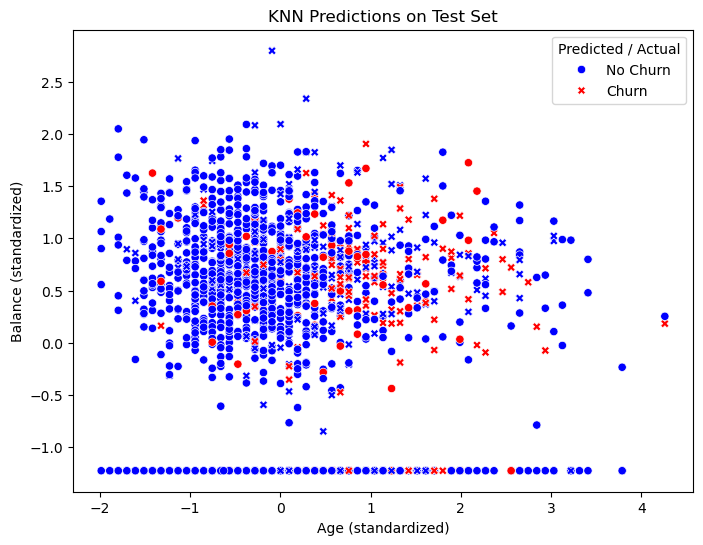

In [33]:
# visualization of results
plt.figure(figsize=(8,6))
sns.scatterplot(
    x = X_test_scaled[:, feature_names.index('Age')],
    y = X_test_scaled[:, feature_names.index('Balance')],
    hue = ["No Churn" if i == 0 else "Churn" for i in y_pred],
    style=["No Churn" if i == 0 else "Churn" for i in y_test],
    palette = {'No Churn': 'blue', 'Churn': 'red'},
)
plt.title('KNN Predictions on Test Set')
plt.xlabel('Age (standardized)')
plt.ylabel('Balance (standardized)')
plt.legend(title='Predicted / Actual')
plt.show()